## collections — Container datatypes
**This module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.**

## Counter objects
**A Counter is a dict subclass for counting hashable objects. It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values.**

    >>> cnt = Counter()
    >>> for word in ['red', 'blue', 'red', 'green', 'blue', 'blue']:
    ...     cnt[word] += 1
    >>> cnt
    Counter({'blue': 3, 'red': 2, 'green': 1})

## itertools — Functions creating iterators for efficient looping

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
import seaborn as sns

In [3]:
from collections import Counter
import itertools
from subprocess import check_output

In [4]:
%matplotlib inline

In [5]:
print(check_output(["dir", "C:\\Users\\Aryan Yadav\\Documents\\Jupyter NBS\\input"],shell=True).decode("utf8"))

 Volume in drive C is Acer
 Volume Serial Number is 303E-8E3D

 Directory of C:\Users\Aryan Yadav\Documents\Jupyter NBS\input

21-05-21  11:20    <DIR>          .
21-05-21  11:20    <DIR>          ..
21-05-21  11:17           240'909 sample_submission.csv
21-05-21  11:19        51'118'296 test.csv
21-05-21  11:19        76'775'041 train.csv
               3 File(s)    128'134'246 bytes
               2 Dir(s)  560'565'039'104 bytes free



In [6]:
#loading the dataset
df = pd.read_csv("input/train.csv")
print(df.shape)
df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### pixel value ranges from 0 to 255 (both inclusive)

In [7]:
label_cnt = Counter(df['label'])
label_cnt

Counter({1: 4684,
         0: 4132,
         4: 4072,
         7: 4401,
         3: 4351,
         5: 3795,
         8: 4063,
         9: 4188,
         2: 4177,
         6: 4137})

<AxesSubplot:xlabel='label', ylabel='count'>

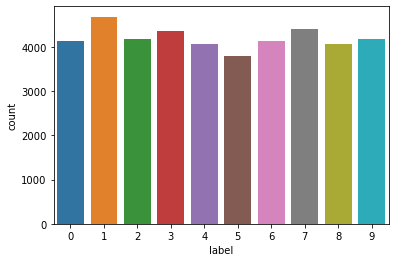

In [8]:
sns.countplot(x='label',data=df) # to check if the classes are balanced

In [9]:
#loading the test dataset
df2= pd.read_csv("input/test.csv")
print(df2.shape)
df2.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = df.drop('label',axis=1).values.astype('float32') # casting will be useful in normalising later on
y = df['label'].values.astype('int32')
X_test = df2.values.astype('float32')

## pandas.DataFrame.astype
**Cast a pandas object to a specified dtype dtype.**                                                                           
**work with numpy arrays too**

## The imshow() function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.

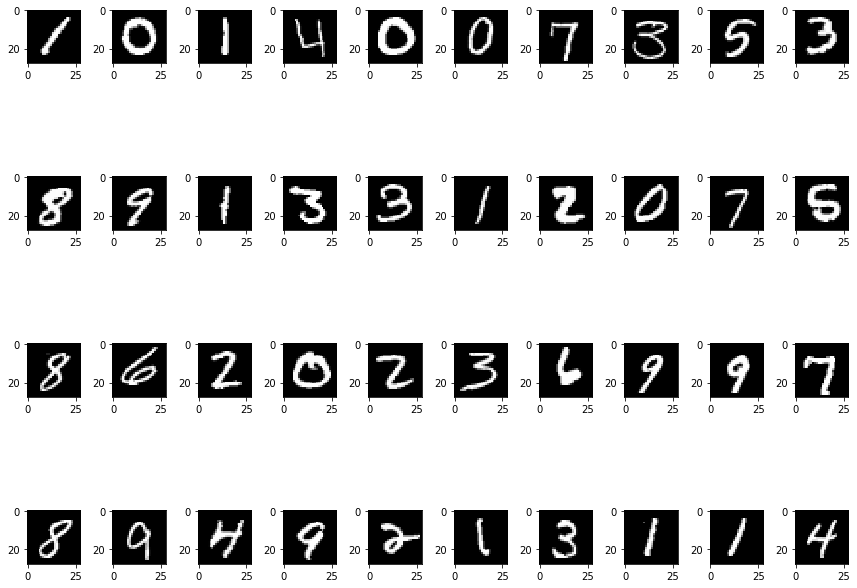

In [11]:
plt.figure(figsize=(12,10))
itr1, itr2 = 10, 4
for i in range(40):  
    plt.subplot(itr2, itr1, i+1)
    plt.imshow(X[i].reshape((28,28)),interpolation='nearest',cmap='gray')
plt.tight_layout()
plt.show()

In [12]:
train_samples = len(X)
print("{} training samples".format(train_samples))
test_samples = len(X_test)
print("{} test samples".format(test_samples))

42000 training samples
28000 test samples


In [13]:
X = X/255.0  # scaling the pixel values between 0 and 1
X_test = X_test/255.0

In [14]:
X = X.reshape(X.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

**The images are 28x28 and 1 color channel (i.e. grayscale rather than something like 3 for RGB)**                             
**The 2D convolution layer in Keras expects the number of channels (by default as the last dimension).**

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)

## converting class vectors to binary class matrices by One Hot Encoding is an important step for multi class classification

In [16]:
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [17]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [18]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.1, random_state=42)

 ## 2D Convolutional Layers
 - When using Convo2D layer as the first layer in a model, provide the keyword argument **input_shape** (tuple of integers)   
    e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures                                                                   
 - **filters** = Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).       
 - **kernel_size** =  An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can     be a single integer to specify the same value for all spatial dimensions.                                                   
 - **kernel_initializer** = Initializer for the kernel weights matrix. Defaults to 'glorot_uniform'.
 - **padding** = one of `"valid"` or `"same"` (case-insensitive).
    `"valid"` means no padding. `"same"` results in padding with zeros evenly
    to the left/right or up/down of the input such that output has the same
    height/width dimension as the input.

## Max Pooling layer (for 2D spatial data)
- Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of   size defined by 'pool_size') for each channel of the input. The window is shifted by 'strides' along each dimension.
- strides = If None, it will default to 'pool_size'.

## ReduceLROnPlateau (Callback)
- Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

## ImageDataGenerator ( to add rotated and scaled data)
- **Generate batches of tensor image data with real-time data augmentation.**
- Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.

## Batch Normalisation
- Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001) # min_lr = lower bound on the learning rate
                                                           # factor =  factor by which the learning rate will be reduced.

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [22]:
datagen.fit(X_train)
data_generator = datagen.flow(X_train,Y_train, batch_size=batch_size);
h = model.fit(data_generator,
              epochs = epochs, validation_data = (X_val,Y_val),
              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
              , callbacks=[learning_rate_reduction]) # // -> floor division 

Epoch 1/20
590/590 [==============================] - 125s 179ms/step - loss: 0.3519 - accuracy: 0.8896 - val_loss: 0.0556 - val_accuracy: 0.9821
Epoch 2/20
590/590 [==============================] - 103s 174ms/step - loss: 0.1121 - accuracy: 0.9666 - val_loss: 0.0375 - val_accuracy: 0.9883
Epoch 3/20
590/590 [==============================] - 101s 170ms/step - loss: 0.0831 - accuracy: 0.9745 - val_loss: 0.0544 - val_accuracy: 0.9840
Epoch 4/20
590/590 [==============================] - 109s 184ms/step - loss: 0.0709 - accuracy: 0.9786 - val_loss: 0.0501 - val_accuracy: 0.9857
Epoch 5/20
590/590 [==============================] - 117s 197ms/step - loss: 0.0602 - accuracy: 0.9811 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 6/20
590/590 [==============================] - 116s 196ms/step - loss: 0.0552 - accuracy: 0.9832 - val_loss: 0.0298 - val_accuracy: 0.9905
Epoch 7/20
590/590 [==============================] - 105s 178ms/step - loss: 0.0523 - accuracy: 0.9838 - val_loss: 0.0458 -

## Image Processing API of Keras
- **datagen** = ImageDataGenerator() :  Image Data Generator created and configured
- **datagen.fit(train)** you must fit the generator on your data . This will calculate any statistics required to actually perform the transforms to your image data.
- **datagen.flow(X_train,Y_train,batch_size=32)** An Iterator yielding tuples of (x, y) where x is a numpy array of image data (in the case of a single image input) or batches of numpy arrays (in the case with additional inputs) and y is a numpy array of corresponding labels. (default batch_size=32)

In [23]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.021707, final accuracy: 0.993571


## HOW TO GET PREDICTED CLASSES OF A MULTI-CLASS CLASSIFICATION

In [24]:
Y_pred = model.predict(X_val)

In [25]:
Y_pred

array([[7.4264400e-10, 1.9908521e-09, 4.3674872e-06, ..., 5.1348420e-10,
        9.9999344e-01, 2.1429391e-06],
       [3.2102443e-07, 9.9999452e-01, 1.3839592e-06, ..., 6.0598205e-07,
        4.6721720e-08, 1.3657649e-07],
       [1.0063596e-07, 1.0778359e-09, 6.6468623e-08, ..., 7.6525311e-07,
        4.3843988e-07, 9.9999726e-01],
       ...,
       [1.1992996e-05, 5.2509272e-06, 1.0257480e-03, ..., 9.9822348e-01,
        1.8773052e-06, 7.4054460e-06],
       [5.4468057e-08, 2.0670539e-09, 4.4083217e-06, ..., 9.9999368e-01,
        1.6006899e-09, 7.0539492e-08],
       [2.8853001e-12, 5.8735715e-13, 1.8436392e-12, ..., 5.2296654e-13,
        4.4364645e-09, 6.0065647e-10]], dtype=float32)

In [27]:
predictions = np.argmax(model.predict(X_val), axis=-1)

In [30]:
predictions

array([8, 1, 9, ..., 7, 7, 5], dtype=int64)

## Getting class values from One Hot Encoding

In [33]:
Y_true = np.argmax(Y_val, axis = 1) 
Y_true

array([8, 1, 9, ..., 7, 7, 5], dtype=int64)

Text(0.5, 69.0, 'Predicted label')

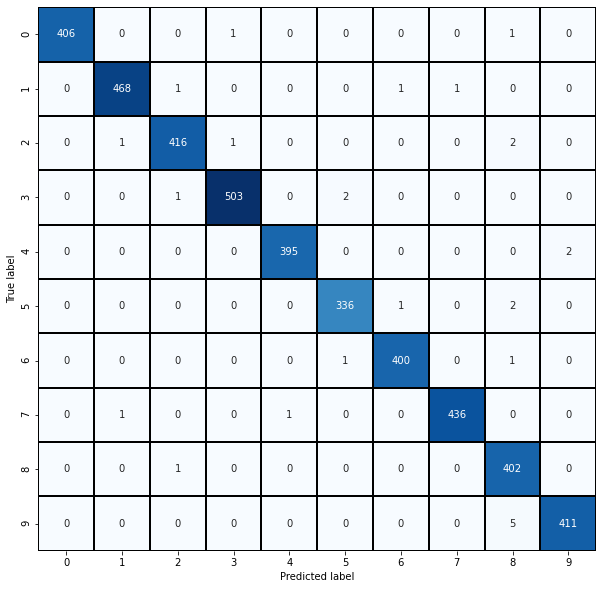

In [55]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(Y_true,predictions),cmap='Blues',annot=True,fmt='g',linecolor='black',linewidth=1,cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [69]:
eval = pd.DataFrame(h.history)
eval

,loss,accuracy,val_loss,val_accuracy,lr
0,0.351879,0.889628,0.055569,0.982143,0.0010
1,0.112138,0.966584,0.037544,0.988333,0.0010
2,0.083053,0.974534,0.054431,0.984048,0.0010
3,0.070854,0.978641,0.050118,0.985714,0.0010
4,0.060215,0.981106,0.032247,0.990000,0.0010
5,0.055217,0.983173,0.029822,0.990476,0.0010
6,0.052300,0.983756,0.045765,0.984048,0.0010
7,0.050647,0.985001,0.034097,0.989762,0.0010
8,0.045040,0.986273,0.026338,0.992381,0.0010
9,0.043811,0.986591,0.027833,0.989762,0.0010


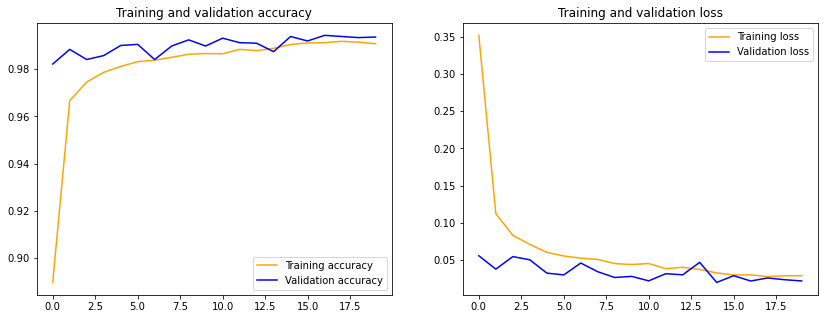

In [76]:
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(14,5))
axes[0].plot(eval['accuracy'], 'orange', label='Training accuracy')
axes[0].plot(eval['val_accuracy'], 'b', label='Validation accuracy')
axes[0].set_title('Training and validation accuracy')
axes[0].legend()
axes[1].plot(eval['loss'], 'orange', label='Training loss')
axes[1].plot(eval['val_loss'], 'b', label='Validation loss')
axes[1].set_title('Training and validation loss')
axes[1].legend()

In [80]:
errors = predictions - Y_true != 0
errors

array([False, False, False, ..., False, False, False])

In [93]:
pred_errors = predictions[errors]

In [94]:
Y_errors = Y_true[errors]

In [86]:
X_errors = X_val[errors]

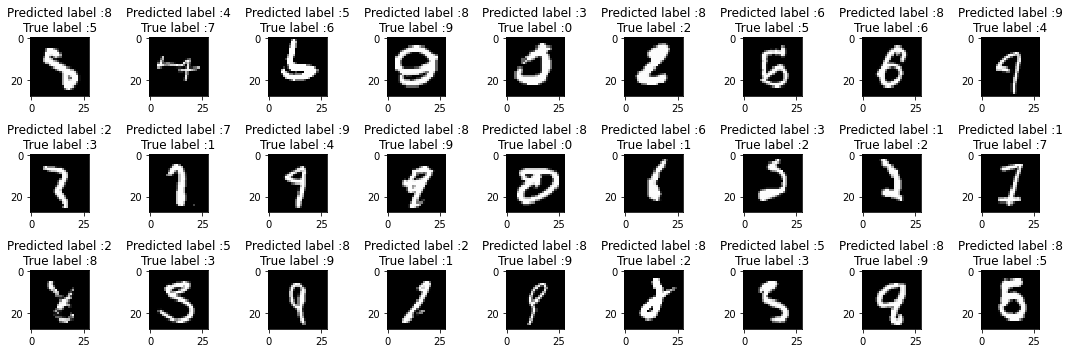

In [96]:
plt.figure(figsize=(15,5))
itr1, itr2 = 9, 3
for i in range(27):  
    plt.subplot(itr2, itr1, i+1)
    plt.imshow(X_errors[i],interpolation='nearest',cmap='gray')
    plt.title("Predicted label :{}\nTrue label :{}".format(pred_errors[i],Y_errors[i]))
plt.tight_layout()
plt.show()

In [97]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_true, predictions, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       408
     Class 1       1.00      0.99      0.99       471
     Class 2       0.99      0.99      0.99       420
     Class 3       1.00      0.99      1.00       506
     Class 4       1.00      0.99      1.00       397
     Class 5       0.99      0.99      0.99       339
     Class 6       1.00      1.00      1.00       402
     Class 7       1.00      1.00      1.00       438
     Class 8       0.97      1.00      0.99       403
     Class 9       1.00      0.99      0.99       416

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



In [98]:
model.save('project_1_model.h5')

In [99]:
json_string = model.to_json()

## Working on new image

In [104]:
from keras.preprocessing.image import load_img, img_to_array

In [161]:
image = load_img("C:\\Users\\Aryan Yadav\\Documents\\Jupyter NBS\\images\\pic.jpg",color_mode='grayscale',target_size=(28,28))

In [162]:
arr = img_to_array(image)

In [163]:
arr = (255.0-arr)

In [164]:
arr = arr/255.0

In [165]:
arr = arr.reshape(1,28,28,1)

In [166]:
pred = np.argmax(model.predict(arr), axis=-1)

In [167]:
pred

array([2], dtype=int64)

In [171]:
history_df = pd.DataFrame(h.history)
history_df

,loss,accuracy,val_loss,val_accuracy,lr
0,0.351879,0.889628,0.055569,0.982143,0.0010
1,0.112138,0.966584,0.037544,0.988333,0.0010
2,0.083053,0.974534,0.054431,0.984048,0.0010
3,0.070854,0.978641,0.050118,0.985714,0.0010
4,0.060215,0.981106,0.032247,0.990000,0.0010
5,0.055217,0.983173,0.029822,0.990476,0.0010
6,0.052300,0.983756,0.045765,0.984048,0.0010
7,0.050647,0.985001,0.034097,0.989762,0.0010
8,0.045040,0.986273,0.026338,0.992381,0.0010
9,0.043811,0.986591,0.027833,0.989762,0.0010


In [172]:
history_df.to_csv("training_history.csv",index=False)